In [2]:
import numpy as np
import random 
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [216]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        print(self.route)
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [12]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [23]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [26]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [36]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [37]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [38]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [223]:
breedPopulation(matingpool , 10)

[(124,117), (120,65), (22,60), (5,113), (32,116), (54,179), (11,164), (18,67), (133,113), (47,166), (102,38), (193,123), (94,138), (94,76), (126,188), (23,157), (102,57), (71,185), (151,68), (92,106), (44,162), (181,198), (173,4), (79,100), (141,17)]
[(181,198), (151,68), (141,17), (92,106), (94,76), (44,162), (32,116), (193,123), (11,164), (71,185), (126,188), (47,166), (102,38), (102,57), (79,100), (133,113), (120,65), (173,4), (5,113), (23,157), (124,117), (54,179), (18,67), (94,138), (22,60)]
[(193,123), (133,113), (5,113), (11,164), (71,185), (92,106), (94,76), (151,68), (54,179), (120,65), (102,38), (94,138), (79,100), (22,60), (126,188), (18,67), (23,157), (44,162), (47,166), (102,57), (141,17), (124,117), (173,4), (32,116), (181,198)]
[(193,123), (173,4), (44,162), (23,157), (151,68), (133,113), (124,117), (94,76), (79,100), (141,17), (120,65), (47,166), (18,67), (181,198), (71,185), (94,138), (126,188), (5,113), (32,116), (102,38), (54,179), (102,57), (11,164), (22,60), (92,10

[[(181,198),
  (193,123),
  (133,113),
  (5,113),
  (11,164),
  (71,185),
  (92,106),
  (94,76),
  (151,68),
  (54,179),
  (120,65),
  (102,38),
  (94,138),
  (79,100),
  (22,60),
  (126,188),
  (18,67),
  (23,157),
  (44,162),
  (47,166),
  (102,57),
  (141,17),
  (173,4),
  (32,116),
  (124,117)],
 [(22,60),
  (32,116),
  (44,162),
  (23,157),
  (173,4),
  (102,38),
  (151,68),
  (11,164),
  (94,76),
  (102,57),
  (120,65),
  (126,188),
  (181,198),
  (47,166),
  (18,67),
  (54,179),
  (94,138),
  (71,185),
  (133,113),
  (193,123),
  (124,117),
  (79,100),
  (92,106),
  (5,113),
  (141,17)],
 [(5,113),
  (193,123),
  (120,65),
  (79,100),
  (47,166),
  (141,17),
  (151,68),
  (133,113),
  (102,57),
  (11,164),
  (23,157),
  (71,185),
  (102,38),
  (94,76),
  (92,106),
  (54,179),
  (94,138),
  (173,4),
  (32,116),
  (124,117),
  (181,198),
  (126,188),
  (44,162),
  (22,60),
  (18,67)],
 [(11,164),
  (47,166),
  (54,179),
  (22,60),
  (44,162),
  (102,38),
  (151,68),
  (124,117),
 

In [222]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        print(child)
        children.append(child)
    return children

In [40]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [41]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [42]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [43]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [85]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [57]:
x_axis = []
y_axis = []

for item in cityList :
    x_axis.append(item.x)
    y_axis.append(item.y)

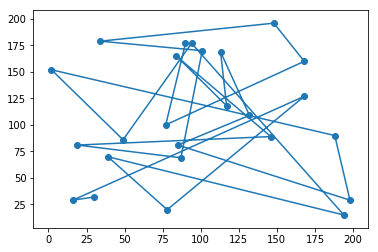

In [172]:
plt.plot(x_axis , y_axis)
plt.scatter(x_axis , y_axis)

In [78]:
final = geneticAlgorithm(population=cityList, popSize=50, eliteSize=10, mutationRate=0.01, generations=500)

Initial distance: 2160.3694823516926
Final distance: 980.7990197544548


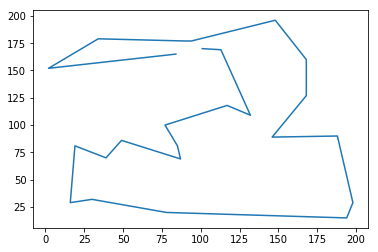

In [79]:
x_final = []
y_final = []

for item in final :
    x_final.append(item.x)
    y_final.append(item.y)
    
plt.plot(x_final , y_final)

In [65]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

In [202]:
1/popRanked[0][1]

2098.92088232992

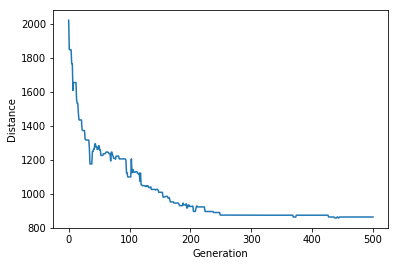

In [66]:
final = geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)